In [1]:
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
import pandas as pd
import datetime
import os
from datetime import datetime
import matplotlib.patheffects as PathEffects
import geocat.viz as gv

import cmaps
import geocat.datafiles as gdf
import geocat.viz as gv
import geocat.viz.util as gvutil
from scipy import stats
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
from scipy import signal
from scipy import stats
import math
import iris

import numpy as np
import pandas as pd
import xarray as xr
import os
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from scipy import stats
import numpy as np
from scipy import signal
import numpy.polynomial.polynomial as poly
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from eofs.standard import Eof
#from geocat.comp import eofunc_eofs, eofunc_pcs

import pint
import pint_pandas

from statistics import mean
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

In [2]:
##Set up all functions
outdir = 'C:/Users/user/Research/Research Code/CNN/PDO/Correlation graph/'
ifile ='C:/Users/user/Research/Research Code/CNN/trainning/CNN_1983_2022/'
ifile_data ='C:/Users/user/Research/Research Code/CNN/Data/'

In [3]:
##Set up all functions
def weighted_areamean(ds):
    '''area mean weighted by cos of latitude'''
    weights = xr.ufuncs.cos(np.deg2rad(ds.lat))
    norm = np.sum(weights) * len(ds.lon)
    amean = (ds*weights).sum(('lat','lon')) / norm

    return amean


def acc_score(x,y):
    '''timestepwise anomaly correlation coefficient, averaged over time
        (simple version without seasonal climatoloty)'''
    assert(x.shape==y.shape)
    return np.mean([np.corrcoef(x[i].flatten(),y[i].flatten())[0,1] for i in range(len(x))])


def corr_over_time(x,y):
    '''timestepwise anomaly correlation coefficient, averaged over time
        (simple version without seasonal climatoloty)'''    
    mx = x[0:i].mean()
    my = y[0:i].mean()
    xm, ym = x[0:i]-mx, y[0:i]-my
    r_num = (xm*ym).mean()
    r_den = xm.std() * ym.std()
    r = r_num / r_den
        
    return r

def mean(x):
    avg = sum(x)/len(x)
    return round(avg,2)


def adjust(ds):
    '''transform the data'''
    z1 = np.array(ds)
    df = pd.DataFrame (z1)
    pred = df.iloc[:,0]
    return pred 

def correlation(x,y,z):
    corr_test = np.corrcoef(x [0:i],y [0:i])[0,1]
    z.append(corr_test)
    
def lowpass_filter (x,y):
    '''fraction of nyquist frequency, here  it is 10 years'''
    fs=1/12/30/24/3600 

    nyquist = fs / 2 # 0.5 times the sampling frequency
    cutoff=x # fraction of nyquist frequency, here  it is 10 years
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter


    dUfilt = signal.filtfilt(b, a, y)
    dUfilt=np.array(dUfilt)
    dUfilt=dUfilt.transpose()
    return dUfilt

def avg(myArray, N=12):
    '''average every 12 months'''
    cum = np.cumsum(myArray,0)
    result = cum[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]

    remainder = myArray.shape[0] % N
    if remainder != 0:
        if remainder < myArray.shape[0]:
            lastAvg = (cum[-1]-cum[-1-remainder])/float(remainder)
        else:
            lastAvg = cum[-1]/float(remainder)
        result = np.vstack([result, lastAvg])

    return result

def detrend_dim(da,trend, dim, deg=1):
    '''detrend along a single dimension'''
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(trend[dim], p.polyfit_coefficients)
    return da - fit

# -- Detorending
def detrend_dim_mme(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

In [4]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='lightgray', linewidth=0.5)
def plot_background(ax):
    ax.coastlines(resolution='110m');
    ax.gridlines(draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle="dotted")
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))      
    ax.add_feature(cfeature.LAND.with_scale('50m'))       
    ax.add_feature(cfeature.LAKES.with_scale('50m'))     
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))    
    ax.add_feature(cfeature.RIVERS.with_scale('50m'))    
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',    
                        facecolor='none', name='coastline')
    ax.add_feature(coast, edgecolor='black')
    
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='gray')

   
    return ax

<function matplotlib.pyplot.show(close=None, block=None)>

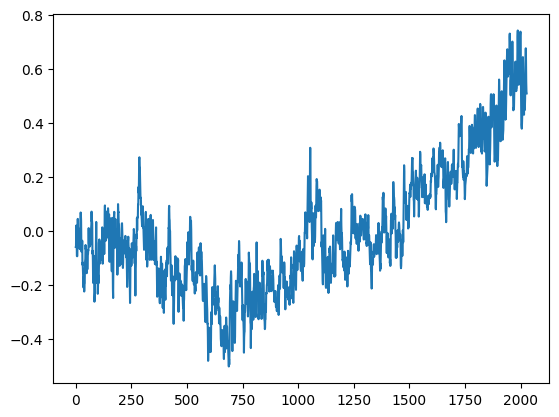

In [5]:
# -- Detorending
def detrend_dim(da,trend, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(trend[dim], p.polyfit_coefficients)
    return da - fit

#find global average
gsst = xr.open_dataarray('C:/Users/user/Research/Research Code/CNN/Data/'+'ersst_1854_2022_mech.nc')
gclm = gsst.groupby('time.month').mean(dim='time')
ganm = (gsst.groupby('time.month') - gclm)
mglobal=ganm.mean(("lon", "lat"), skipna=True)
plt.plot(mglobal)
plt.show

In [6]:
#Import y_testsize
testsizepath='C:/Users/user/Research/Research Code/CNN/y_test/y_testsize_1_23_64.nc'
y_test_size= xr.open_dataarray(testsizepath)

# Channel-wise-based CNN 

In [7]:
##Saved path of Channel-wise-based CNN prediction
ifile ='C:/Users/user/Research/Research Code/CNN/trainning/channelwise_Nonnormalised/train_1428/'
ifile_data = 'C:/Users/user/Research/Research Code/CNN/Data/'
outdir_original_pred = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/original/pred/'
outdir_original_test = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/original/test/'
outdir_original_valid = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/original/validation/'
outdir_smooth_pred = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred/'
outdir_smooth_test= 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/test/'
outdir_smooth_valid= 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/validation/'
outdir_correlation = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/correlation/'
outdir_smooth_pred_label = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred_label/'
save_path = 'C:/Users/user/Research/Research Code/CNN/PDO/Heatmap/'

In [8]:
##import land mask

ifile_lsm ='C:/Users/user/Research/Research Code/CNN/PDO/Correlation graph/'
lmset  = Dataset(ifile_lsm+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

##Setup validation period
ystr = 1983
yend = 2022

##setup lat dimension
lead_time = 359
N_train = 1428

##Imported ensemble training results used to transform land mask
ncin = Dataset(ifile+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')

sst  = ncin.variables['__xarray_dataarray_variable__'][:,:-9,:] 
time  = ncin.variables['time'][:]
lat  = ncin.variables['lat'][:-9]
lon  = ncin.variables['lon'][:]
lev  = ncin.variables['lev'][:]
ncin.close()

nt,nlat,nlon,nlev = sst.shape    
print(sst.shape )

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

## Imported pred data 
ds = xr.open_dataset(ifile+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')

ds = ds.sel(lat=slice(70, 20), lon=slice(122, 250))
print(ds)

(480, 23, 64, 1)
<xarray.Dataset>
Dimensions:                        (time: 480, lat: 23, lon: 64, lev: 1)
Coordinates:
  * time                           (time) datetime64[ns] 1983-01-01 ... 2022-...
  * lat                            (lat) float32 64.0 62.0 60.0 ... 22.0 20.0
  * lon                            (lon) float32 122.0 124.0 ... 246.0 248.0
  * lev                            (lev) float64 0.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon, lev) float32 ...


(480, 23, 64)

In [9]:
##lable PDO from channel-wise-based CNN prediction
mean_Correlation_cnn_ncei_filter = []

N_train = 1428
ystr = 1983
yend = 2022

ifile = 'C:/Users/user/Research/Research Code/CNN/trainning/channelwise_Nonnormalised/train_1428/'

##setup lat dimension
for lead_time in range(0,360):

    ncin = Dataset(ifile+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')


    sst  = ncin.variables['__xarray_dataarray_variable__'][:,:-9,:] 
    time  = ncin.variables['time'][:]
    lat  = ncin.variables['lat'][:-9]
    lon  = ncin.variables['lon'][:]
    lev  = ncin.variables['lev'][:]
    ncin.close()

    nt,nlat,nlon,nlev = sst.shape    

    ## import pred data
    ds = xr.open_dataset(ifile+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')

    ds = ds.sel(lat=slice(70, 20), lon=slice(122, 250))

    # === Climatology and Anomalies
    sst = ds.__xarray_dataarray_variable__
    clm = sst.sel(time=slice(f'{ystr}-01-01',f'{yend}-12-01')).groupby('time.month').mean(dim='time')
    anm = (sst.groupby('time.month') - clm)

    anm=anm.isel(lev=0)

    ##Prediction
    #detrend
    dpdo = detrend_dim(anm,mglobal,'time',1)
    
    #Mask out land
    sst_diff = dpdo
    sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
    sst_diff[lsm<0] = np.nan
    #sst_diff=sst_diff.to_numpy()
    
    #To perform the EOF analysis, create an EOF solver.
    #Prior to computing the EOFs, latitude weights are applied with a cosine.
    wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
    wgts   = wgts.reshape(len(wgts), 1)
    wgts.shape

    #Obtained the leading EOFs

    solver = Eof(sst_diff, weights=wgts)

    eof1 = solver.eofs(neofs=1)
    pc1  = solver.pcs(npcs=1, pcscaling=0)
    varfrac = solver.varianceFraction()
    lambdas = solver.eigenvalues()

    leading_eof = solver.eofsAsCorrelation(neofs=1)
    
    #Creat PDO index
    pc=pc1 [:,]
    pc_mean=pc1[:,].mean()
    pc_std=pc1[:,].std()

    #Normalised
    pcs = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    pc,
    pc_mean,
    pc_std, dask = 'allowed', vectorize = True)
    pcs.shape
    
    ##Convert values
    PDO=pcs[:,0]
    
    ##Smoothed with 10-year low pass
    cutoff = 0.05
    lw_pred = lowpass_filter(cutoff ,PDO)
    np.savetxt(outdir_smooth_pred+'Result_PDO index_pred_cwcnn_smoothed'+str(lead_time)+'.csv',lw_pred, 
               delimiter=',', fmt='%.5f')
    
    PDO_cnn = np.loadtxt(outdir_smooth_pred+'Result_PDO index_pred_cwcnn_smoothed'+str(lead_time)+'.csv', dtype=float)
    PDO_pred = adjust(PDO_cnn)
    
    ##lable predicted data
    temp_PDO = PDO_pred.values
    time = pd.date_range("1983-01-01", periods=480,freq='M')
    reference_time = pd.Timestamp("1983-01-01")

    label_PDO = xr.DataArray(
    data=temp_PDO,
    dims=["time"],
    coords=dict( time=time,reference_time=reference_time,),attrs=dict(description="Ambient temperature.",units="degC",),)
    
    
    index=label_PDO
    
    index_1=index.sel(time=slice(f'{ystr}-12-01',f'{yend+1}-02-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(1)+'.csv', index_1, delimiter=',', fmt='%.5f')
    index_2=index.sel(time=slice(f'{ystr}-11-01',f'{yend+1}-01-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(2)+'.csv', index_2, delimiter=',', fmt='%.5f')
    index_3=index.sel(time=slice(f'{ystr}-10-01',f'{yend}-12-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(3)+'.csv', index_3, delimiter=',', fmt='%.5f')
    index_4=index.sel(time=slice(f'{ystr}-9-01',f'{yend}-11-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(4)+'.csv', index_4, delimiter=',', fmt='%.5f')
    index_5=index.sel(time=slice(f'{ystr}-8-01',f'{yend}-10-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(5)+'.csv', index_5, delimiter=',', fmt='%.5f')
    index_6=index.sel(time=slice(f'{ystr}-7-01',f'{yend}-9-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(6)+'.csv', index_6, delimiter=',', fmt='%.5f')
    index_7=index.sel(time=slice(f'{ystr}-6-01',f'{yend}-8-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(7)+'.csv', index_7, delimiter=',', fmt='%.5f')
    index_8=index.sel(time=slice(f'{ystr}-5-01',f'{yend}-7-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(8)+'.csv', index_8, delimiter=',', fmt='%.5f')
    index_9=index.sel(time=slice(f'{ystr}-4-01',f'{yend}-6-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(9)+'.csv', index_9, delimiter=',', fmt='%.5f')
    index_10=index.sel(time=slice(f'{ystr}-3-01',f'{yend}-5-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(10)+'.csv', index_10, delimiter=',', fmt='%.5f')
    index_11=index.sel(time=slice(f'{ystr}-2-01',f'{yend}-4-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(11)+'.csv', index_11, delimiter=',', fmt='%.5f')
    index_12=index.sel(time=slice(f'{ystr}-1-01',f'{yend}-3-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(12)+'.csv', index_12, delimiter=',', fmt='%.5f')
    

In [10]:
##lable PDO from ncei 
#Import validation data from NCEI PDO index from 1983-2022 
#https://www.ncei.noaa.gov/access/monitoring/pdo/
PDO_ncei = pd.read_excel(ifile_data+'NCEI PDO index _overall.xlsx',header=None,index_col=None,
                      skiprows=985, skipfooter = 0,
                      usecols=[1]  
                     )

#Smoothed with 10-year low pass
PDO_ncei = adjust(PDO_ncei)
lw_ncei = lowpass_filter(cutoff ,PDO_ncei)
PDO_ncei=adjust(lw_ncei)
    
    
temp = PDO_ncei.values
time = pd.date_range("1983-01-01", periods=480,freq='M')
reference_time = pd.Timestamp("1983-01-01")

label_PDO = xr.DataArray(
data=temp,
dims=["time"],
coords=dict( time=time,reference_time=reference_time,),attrs=dict(description="Ambient temperature.",units="degC",    ),)


    
##label predicted data
index = label_PDO
for lead_time in range (0,360):
 
    index_1=index.sel(time=slice(f'{ystr}-12-01',f'{yend+1}-02-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(1)+'.csv', index_1, delimiter=',', fmt='%.5f')
    index_2=index.sel(time=slice(f'{ystr}-11-01',f'{yend+1}-01-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(2)+'.csv', index_2, delimiter=',', fmt='%.5f')
    index_3=index.sel(time=slice(f'{ystr}-10-01',f'{yend}-12-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(3)+'.csv', index_3, delimiter=',', fmt='%.5f')
    index_4=index.sel(time=slice(f'{ystr}-9-01',f'{yend}-11-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(4)+'.csv', index_4, delimiter=',', fmt='%.5f')
    index_5=index.sel(time=slice(f'{ystr}-8-01',f'{yend}-10-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(5)+'.csv', index_5, delimiter=',', fmt='%.5f')
    index_6=index.sel(time=slice(f'{ystr}-7-01',f'{yend}-9-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(6)+'.csv', index_6, delimiter=',', fmt='%.5f')
    index_7=index.sel(time=slice(f'{ystr}-6-01',f'{yend}-8-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(7)+'.csv', index_7, delimiter=',', fmt='%.5f')
    index_8=index.sel(time=slice(f'{ystr}-5-01',f'{yend}-7-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(8)+'.csv', index_8, delimiter=',', fmt='%.5f')
    index_9=index.sel(time=slice(f'{ystr}-4-01',f'{yend}-6-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(9)+'.csv', index_9, delimiter=',', fmt='%.5f')
    index_10=index.sel(time=slice(f'{ystr}-3-01',f'{yend}-5-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(10)+'.csv', index_10, delimiter=',', fmt='%.5f')
    index_11=index.sel(time=slice(f'{ystr}-2-01',f'{yend}-4-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(11)+'.csv', index_11, delimiter=',', fmt='%.5f')
    index_12=index.sel(time=slice(f'{ystr}-1-01',f'{yend}-3-01',12))
    np.savetxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(lead_time)+'train_'+str(N_train)+'month_'+str(12)+'.csv', index_12, delimiter=',', fmt='%.5f')
    
    

# Determine the RMSE of EOF in different phases

# CMIP6

In [11]:
##import lsmask for CMIP6

ifile_lsm ='C:/Users/user/Research/Research Code/CNN/PDO/Correlation graph/'
lmset  = Dataset(ifile_lsm+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

(480, 23, 64)

In [12]:
ifile ='C:/Users/user/Research/Research Code/CNN/PDO/Correlation graph/'
ifile_data = 'C:/Users/user/Research/Research Code/CNN/Data/'

(103, 23, 64)
<xarray.Dataset>
Dimensions:    (time: 103, bnds: 2, lon: 64, lat: 23)
Coordinates:
  * time       (time) datetime64[ns] 2005-08-16T12:00:00 ... 2014-02-15
  * lon        (lon) float32 122.0 124.0 126.0 128.0 ... 242.0 244.0 246.0 248.0
  * lat        (lat) float32 64.0 62.0 60.0 58.0 56.0 ... 26.0 24.0 22.0 20.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    source:                 CAMS_CSM 1.0 (2016): \naerosol: none\natmos: ECHA...
    institution:            Chinese Academy of Meteorological Sciences, Beiji...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    ...                     ...
    tracking_id:            hdl:21.14100/032a2965-33bb-4a4c-9c0d-12a3f5e19439
    variable_id:            tos
    variant_labe

C:\Users\User\AppData\Local\Temp\ipykernel_24268\3224699922.py:27: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex=ds.indexes['time'].to_datetimeindex()


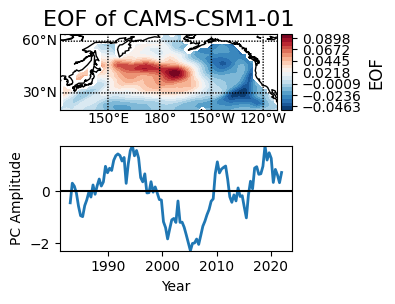

In [13]:
##Cold Phase 2005/08-2014/02

##Setup validation period
ystr = 2005
yend = 2014

##setup lat dimension
lead_time = 0
N_train = 1428

ncin = Dataset(ifile+'Regird_mergetime_CAMS-CSM1-0_2x2.nc')


sst  = ncin.variables['tos'][30:133,12:35,61:125] 
time  = ncin.variables['time'][30:133]
lat  = ncin.variables['lat'][12:35]
lon  = ncin.variables['lon'][61:125]

ncin.close()

nt,nlat,nlon = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(ifile+'Regird_mergetime_CAMS-CSM1-0_2x2.nc')

#transform date and time
datetimeindex=ds.indexes['time'].to_datetimeindex()
ds['time'] = datetimeindex

ds = ds.sel(lat=slice(64, 20), lon=slice(122, 248))
ds= ds.sel(time=slice(f'{ystr}-08-01',f'{yend}-03-01'))

print(ds)

##import lsmask
lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

a = np.arange('1983-01', '2023-01', dtype='datetime64[M]')
time_graph = np.arange(1, 41)

sst = ds.tos
clm = sst.groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

# detrend
dpdo = detrend_dim_mme(anm,'time',1)
test = dpdo.mean(('lat','lon'))

#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan

print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

#Obtained the leading EOFs

solver = Eof(sst_diff, weights=wgts)

eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(

lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape


PDO=pcs[:,0]

parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF of CAMS-CSM1-0' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))

mme_eof_cold=eof1

(33, 23, 64)
<xarray.Dataset>
Dimensions:    (time: 33, bnds: 2, lon: 64, lat: 23)
Coordinates:
  * time       (time) datetime64[ns] 1995-08-16T12:00:00 ... 1998-04-16
  * lon        (lon) float32 122.0 124.0 126.0 128.0 ... 242.0 244.0 246.0 248.0
  * lat        (lat) float32 64.0 62.0 60.0 58.0 56.0 ... 26.0 24.0 22.0 20.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    source:                 CAMS_CSM 1.0 (2016): \naerosol: none\natmos: ECHA...
    institution:            Chinese Academy of Meteorological Sciences, Beiji...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    ...                     ...
    tracking_id:            hdl:21.14100/032a2965-33bb-4a4c-9c0d-12a3f5e19439
    variable_id:            tos
    variant_label:

C:\Users\User\AppData\Local\Temp\ipykernel_24268\2514473911.py:27: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex=ds.indexes['time'].to_datetimeindex()


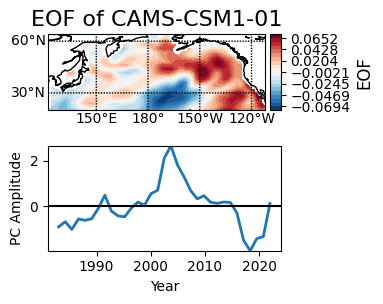

In [14]:
##Warm Phase 1995/02-1998/04

##Setup validation period
ystr = 1995
yend = 1998

##setup lat dimension
lead_time = 0
N_train = 1428


ncin = Dataset(ifile+'Regird_mergetime_CAMS-CSM1-0_2x2.nc')


sst  = ncin.variables['tos'][152:185,12:35,61:125] 
time  = ncin.variables['time'][152:185]
lat  = ncin.variables['lat'][12:35]
lon  = ncin.variables['lon'][61:125]

ncin.close()

nt,nlat,nlon = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(ifile+'Regird_mergetime_CAMS-CSM1-0_2x2.nc')

#transform date and time
datetimeindex=ds.indexes['time'].to_datetimeindex()
ds['time'] = datetimeindex

ds = ds.sel(lat=slice(64, 20), lon=slice(122, 248))
ds= ds.sel(time=slice(f'{ystr}-08-01',f'{yend}-05-01'))

print(ds)

##import lsmask

lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

a = np.arange('1983-01', '2023-01', dtype='datetime64[M]')
time_graph = np.arange(1, 41)

sst = ds.tos
clm = sst.groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

# detrend
dpdo = detrend_dim_mme(anm,'time',1)
test = dpdo.mean(('lat','lon'))


#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan
print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

solver = Eof(sst_diff, weights=wgts)

#Obtained the leading EOFs
eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(

lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape


PDO=pcs[:,0]

parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF of CAMS-CSM1-0' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))

mme_eof_warm=eof1


# Channel-wise CNN prediction

(103, 23, 64, 1)
<xarray.Dataset>
Dimensions:                        (time: 480, lat: 23, lon: 64, lev: 1)
Coordinates:
  * time                           (time) datetime64[ns] 1983-01-01 ... 2022-...
  * lat                            (lat) float32 64.0 62.0 60.0 ... 22.0 20.0
  * lon                            (lon) float32 122.0 124.0 ... 246.0 248.0
  * lev                            (lev) float64 0.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon, lev) float32 ...
(103, 23, 64)


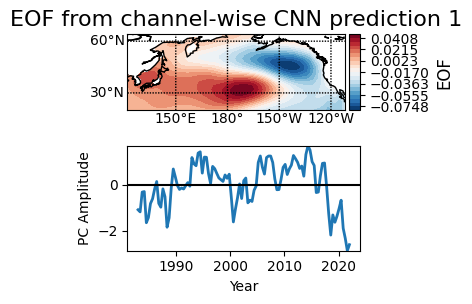

In [15]:
##Cold Phase 2005/08-2014/02

##Setup validation period
ystr = 2005
yend = 2014

##setup lat dimension
lead_time = 359
N_train = 1428
ifile_pred ='C:/Users/user/Research/Research Code/CNN/trainning/channelwise_Nonnormalised/train_1428/'
ncin = Dataset(ifile_pred+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')


sst  = ncin.variables['__xarray_dataarray_variable__'][272:375,:-9,:] 
time  = ncin.variables['time'][272:375]
lat  = ncin.variables['lat'][:-9]
lon  = ncin.variables['lon'][:]
lev  = ncin.variables['lev'][:]
ncin.close()

nt,nlat,nlon,nlev = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(ifile_pred+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')

ds = ds.sel(lat=slice(70, 20), lon=slice(122, 250))

print(ds)

# === Climatology and Anomalies
sst = ds.__xarray_dataarray_variable__
sst = sst.sel(time=slice(f'{ystr}-08-01',f'{yend}-02-01'))
clm = sst.sel(time=slice(f'{ystr}-08-01',f'{yend}-02-01')).groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

anm=anm.isel(lev=0)

##import lsmask
lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape


##Prediction
#detrend
dpdo = detrend_dim(anm,mglobal,'time',1)

#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan

print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

#Obtained the leading EOFs
solver = Eof(sst_diff, weights=wgts)

eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(

lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape


pcs=pcs[:,0]
PDO=[]
for i in range(0,103):
    if pcs[30] < 0:
        x=pcs[i]*-1
    else:
        x=pcs[i]*1
    PDO.append(x)
    
parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF from channel-wise CNN prediction ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))
    
cnn_eof_cold=eof1

(39, 23, 64, 1)
<xarray.Dataset>
Dimensions:                        (time: 480, lat: 23, lon: 64, lev: 1)
Coordinates:
  * time                           (time) datetime64[ns] 1983-01-01 ... 2022-...
  * lat                            (lat) float32 64.0 62.0 60.0 ... 22.0 20.0
  * lon                            (lon) float32 122.0 124.0 ... 246.0 248.0
  * lev                            (lev) float64 0.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon, lev) float32 ...
(39, 23, 64)


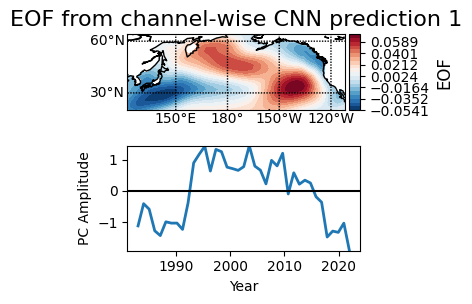

In [16]:
##Warm Phase 1995/02-1998/04

##Setup validation period
ystr = 1995
yend = 1998

##setup lat dimension
lead_time = 359
N_train = 1428
ifile_pred ='C:/Users/user/Research/Research Code/CNN/trainning/channelwise_Nonnormalised/train_1428/'
ncin = Dataset(ifile_pred+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')


sst  = ncin.variables['__xarray_dataarray_variable__'][146:185,:-9,:] 
time  = ncin.variables['time'][146:185]
lat  = ncin.variables['lat'][:-9]
lon  = ncin.variables['lon'][:]
lev  = ncin.variables['lev'][:]
ncin.close()

nt,nlat,nlon,nlev = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(ifile_pred+'predictions_tuned_leadtime'+str(lead_time)+'params_'+str(N_train)+'_10_'+str(lead_time)+'.nc')

ds = ds.sel(lat=slice(70, 20), lon=slice(122, 250))


print(ds)


# === Climatology and Anomalies 
sst = ds.__xarray_dataarray_variable__
sst = sst.sel(time=slice(f'{ystr}-02-01',f'{yend}-04-01'))
clm = sst.sel(time=slice(f'{ystr}-02-01',f'{yend}-04-01')).groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

anm=anm.isel(lev=0)

##import lsmask
lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

##Prediction
#detrend
dpdo = detrend_dim(anm,mglobal,'time',1)

#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan
print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

#Obtained the leading EOFs
solver = Eof(sst_diff, weights=wgts)

eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(
lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape


PDO=pcs[:,0]
    
parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF from channel-wise CNN prediction ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))
    
cnn_eof_warm=eof1

# Validation

(103, 23, 64)
<xarray.Dataset>
Dimensions:  (lat: 23, lon: 64, time: 103)
Coordinates:
  * lat      (lat) float32 64.0 62.0 60.0 58.0 56.0 ... 28.0 26.0 24.0 22.0 20.0
  * lon      (lon) float32 122.0 124.0 126.0 128.0 ... 242.0 244.0 246.0 248.0
  * time     (time) datetime64[ns] 2005-08-01 2005-09-01 ... 2014-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on 

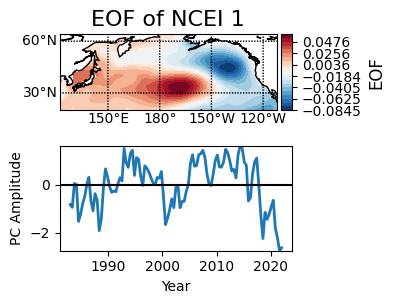

In [17]:
##Cold Phase 2005/08-2014/02
ifile_test = 'C:/Users/User/Research/Research Code/CNN/Data/'
fnc = ifile_test+'ersst_1854_2022_mech.nc'

ncin = Dataset(fnc)


sst  = ncin.variables['sst'][1820:1923,12:35,61:125] 
time  = ncin.variables['time'][1820:1923]
lat  = ncin.variables['lat'][12:35]
lon  = ncin.variables['lon'][61:125]

ncin.close()

nt,nlat,nlon = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(fnc)

#transform date and time
ystr = 2005
yend = 2014

ds = ds.sel(lat=slice(64, 20), lon=slice(122, 248))
ds= ds.sel(time=slice(f'{ystr}-08-01',f'{yend}-02-01'))


print(ds)

##import lsmask
lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

a = np.arange('1983-01', '2023-01', dtype='datetime64[M]')
time_graph = np.arange(1, 41)

sst = ds.sst
clm = sst.groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

# detrend
dpdo = detrend_dim_mme(anm,'time',1)
test = dpdo.mean(('lat','lon'))


#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan
print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

#Obtained the leading EOFs
solver = Eof(sst_diff, weights=wgts)

eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(

lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape

PDO=pcs[:,0]

parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF of NCEI ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))

test_eof_cold=eof1

(39, 23, 64)
<xarray.Dataset>
Dimensions:  (lat: 23, lon: 64, time: 39)
Coordinates:
  * lat      (lat) float32 64.0 62.0 60.0 58.0 56.0 ... 28.0 26.0 24.0 22.0 20.0
  * lon      (lon) float32 122.0 124.0 126.0 128.0 ... 242.0 244.0 246.0 248.0
  * time     (time) datetime64[ns] 1995-02-01 1995-03-01 ... 1998-04-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on da

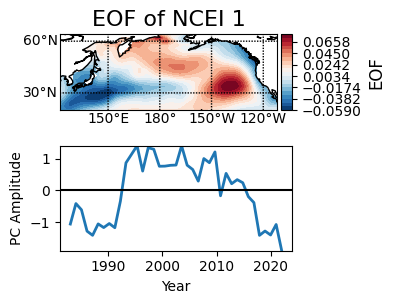

In [18]:
##Warm Phase 1995/02-1998/04
ifile_test = 'C:/Users/User/Research/Research Code/CNN/Data/'
fnc = ifile_test+'ersst_1854_2022_mech.nc'

ncin = Dataset(fnc)

sst  = ncin.variables['sst'][1694:1733,12:35,61:125] 
time  = ncin.variables['time'][1694:1733]
lat  = ncin.variables['lat'][12:35]
lon  = ncin.variables['lon'][61:125]

ncin.close()

nt,nlat,nlon = sst.shape    
print(sst.shape )

## import pred data
ds = xr.open_dataset(fnc)


ystr = 1995
yend = 1998

ds = ds.sel(lat=slice(64, 20), lon=slice(122, 248))
ds= ds.sel(time=slice(f'{ystr}-02-01',f'{yend}-04-01'))

print(ds)

##import lsmask
lmset  = Dataset(ifile+'Remap_lsmask_2x2.nc')
lsmask = lmset['mask'][0,12:35,61:125]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

a = np.arange('1983-01', '2023-01', dtype='datetime64[M]')
time_graph = np.arange(1, 41)

sst = ds.sst
clm = sst.groupby('time.month').mean(dim='time')
anm = (sst.groupby('time.month') - clm)

# detrend
dpdo = detrend_dim_mme(anm,'time',1)
test = dpdo.mean(('lat','lon'))


#Mask out land
sst_diff = dpdo
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan
print(sst_diff.shape)

#To perform the EOF analysis, create an EOF solver.
#Prior to computing the EOFs, latitude weights are applied with a cosine.
wgts   = np.sqrt(np.cos(np.deg2rad(lat)))
wgts   = wgts.reshape(len(wgts), 1)
wgts.shape

#Obtained the leading EOFs
solver = Eof(sst_diff, weights=wgts)

eof1 = solver.eofs(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()
Covariance_eof1 = solver.eofsAsCovariance(neofs=1, pcscaling=0)

leading_eof = solver.eofsAsCorrelation(neofs=1)
eigenvalue1 = solver.eigenvalues(neigs=1)

#Creat PDO index
pc=pc1 [:,]
pc_mean=pc1[:,].mean()
pc_std=pc1[:,].std()

#Normalised
pcs = xr.apply_ufunc(

lambda x, m, s: x  / s,
pc,
pc_mean,
pc_std, dask = 'allowed', vectorize = True)
pcs.shape


PDO=pcs[:,0]

parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,1):
    fig = plt.figure(figsize=(3,3))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))   
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF of NCEI ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1983,2022,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))

test_eof_warm=eof1

# Make correlation

In [19]:
testsizepath='C:/Users/user/Research/Research Code/CNN/y_test/y_testsize_1_23_64.nc'
y_test_size= xr.open_dataarray(testsizepath)

# convert data
y_test_cold = xr.DataArray(data=test_eof_cold, coords=y_test_size.coords, dims=y_test_size.dims)
y_cnn_cold = xr.DataArray(data=cnn_eof_cold, coords=y_test_size.coords, dims=y_test_size.dims)
y_mme_cold = xr.DataArray(data=mme_eof_cold, coords=y_test_size.coords, dims=y_test_size.dims)
y_test_warm = xr.DataArray(data=test_eof_warm, coords=y_test_size.coords, dims=y_test_size.dims)
y_cnn_warm = xr.DataArray(data=cnn_eof_warm, coords=y_test_size.coords, dims=y_test_size.dims)
y_mme_warm = xr.DataArray(data=mme_eof_warm, coords=y_test_size.coords, dims=y_test_size.dims)

In [20]:
rmse_timmean_cnn_cold = np.sqrt(((y_cnn_cold - y_test_cold)**2).mean('time'))
rmse_timmean_cnn_warm = np.sqrt(((y_cnn_warm - y_test_warm)**2).mean('time'))

In [21]:
rmse_timmean_mme_cold = np.sqrt(((y_mme_cold - y_test_cold)**2).mean('time'))
rmse_timmean_mme_warm = np.sqrt(((y_mme_warm - y_test_warm)**2).mean('time'))

# Plot RMSE

In [27]:
#Created Channel-wise-based CNN seasonal heatmap

outdir_smooth_pred_label = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred_label/'

mon_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
            '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
mon_list_skip = ['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23']
mon_name = ['JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']


cor_cnn = np.zeros((360,12))


for i in range(0,360,1):
    for j in range(1,13,1):
        
        # Open Channel-wise-based CNN output
        PDO_cnn = np.loadtxt(outdir_smooth_pred_label+'PDO_lead_'+str(i)+'train_'+str(N_train)+'month_'+str(j)+'.csv',dtype=float)
        PDO_mix = np.loadtxt(outdir_smooth_pred_label+'PDO_ncei_lead_'+str(i)+'train_'+str(N_train)+'month_'+str(j)+'.csv',dtype=float)
        
        pick_cnn = np.zeros((40),dtype=np.float32) 
        pick_lab = np.zeros((40),dtype=np.float32) 
     
        num = 0
        for k in range(40):
              if PDO_mix[k] != -9.99e+08:
                pick_cnn[num] = PDO_cnn[k]
                pick_lab[num] = PDO_mix[k]       
                num = num + 1      
            
        cor_cnn[int(i),int(j-1)]    = np.corrcoef(pick_lab[0:num],pick_cnn[0:num])[0,1]
        
new_cor_cnn =   np.mean(cor_cnn,axis=1)
newarr=avg(cor_cnn,N=12)
mean_cor_cnn =   np.mean(newarr,axis=1)
mean_cor_cnn = [1 if math.isnan(x) else x for x in mean_cor_cnn]

#Prepared data to plot in heatmap
low_cnn=min(mean_cor_cnn)
high_cnn=max(mean_cor_cnn)

cnn_map = np.swapaxes(newarr,0,1)
cnn_map= np.nan_to_num(cnn_map, nan=1)
zm1_cnn = np.ma.masked_less(cnn_map,np.mean(mean_cor_cnn))

cnn_map_cwcnn=cnn_map

In [28]:
#Created CAMS-CSM1-0 seasonal heatmap
ifile ='C:/Users/user/Research/Research Code/MME_CMIP6/data/1983_2023/'
ifile_data = 'C:/Users/user/Research/Research Code/CNN/Data/'
outdir_original_pred = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/original/pred/'
outdir_original_test = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/original/test/'
outdir_original_valid = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/original/validation/'
outdir_smooth_pred = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/pred/'
outdir_smooth_test= 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/test/'
outdir_smooth_valid= 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/validation/'
outdir_correlation = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/correlation/'
outdir_smooth_pred_label = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/pred_label/'

cutoff = 0.05
lw_pred = lowpass_filter(cutoff ,PDO)
PDO_cnn = np.loadtxt(outdir_smooth_pred+'Result_PDO index_CAMS-CSM1-0_smoothed'+'.csv', dtype=float)
PDO_pred = adjust(PDO_cnn)

##Import observation
PDO_ncei = pd.read_excel(ifile_data+'NCEI PDO index _overall.xlsx',header=None,index_col=None,
                      skiprows=985, skipfooter = 0,
                      usecols=[1]  
                     )



PDO_ncei = adjust(PDO_ncei)
temp = PDO_ncei.values
time = pd.date_range("1983-01-01", periods=480,freq='M')
reference_time = pd.Timestamp("1983-01-01")
PDO_ncei = xr.DataArray(data=temp,dims=["time"],coords=dict( time=time,reference_time=reference_time,),
                        attrs=dict(description="Ambient temperature.",units="degC",    ),)

lw_ncei = lowpass_filter(cutoff ,PDO_ncei)
PDO_ncei=adjust(lw_ncei)


cutoff = 0.05

mon_list_skip = ['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '23']
mon_name = ['JFM','FMA','MAM','AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']

cor_cnn = np.zeros((40,12))
pick_cnn = np.zeros((480),dtype=np.float32)
pick_lab = np.zeros((480),dtype=np.float32)

num = 0
for k in range(480):
      if PDO_ncei[k] != -9.99e+08:
        pick_cnn[num] = PDO_pred[k]
        pick_lab[num] = PDO_ncei[k]
        num = num + 1

cor_cnn = np.zeros((40,12))
num = 0
for i in range(0,40,1):
    for j in range(1,13,1):
        cor_cnn[int(i),int(j-1)] = np.corrcoef(pick_lab[0:num],pick_cnn[0:num])[0,1]
        num = num + 1


mean_cor_cnn =   np.mean(cor_cnn,axis=1)
mean_cor_cnn = [1 if math.isnan(x) else x for x in mean_cor_cnn]

#Prepared data to plot in heatmap
cor_cnn=cor_cnn.flatten()

cor_cnn=np.convolve(cor_cnn, np.ones(3)/3, mode='same')
cor_cnn = np.nan_to_num(cor_cnn, nan=1)
newarr = cor_cnn.reshape(40, 12)
cnn_map = np.swapaxes(newarr,0,1)   
cnn_map= np.nan_to_num(cnn_map, nan=1)
marks = mean_cor_cnn[24:384]
cnn_map = cnn_map[:,2:32]

low_mme=min(mean_cor_cnn)
high_mme=max(mean_cor_cnn)

zm1_mme = np.ma.masked_less(cnn_map,np.mean(mean_cor_cnn))

cnn_map_mme=cnn_map

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [29]:
##function to plot seasonal heatmap
def imagemaker_season(cnn_map,low,high,zm1,grid_space,pic_number):
    
    ax = fig.add_subplot(grid_space)
    
    x = np.arange(0,30)
    y = np.arange(0,12)
    
    plt.pcolor(x, y, zm1, hatch='/////', alpha=0.,zorder=4)
    mpl.rcParams['hatch.linewidth'] = 0.5
    cax = plt.imshow(cnn_map[:,:],cmap='OrRd',clim=[low,high])
    plt.gca().invert_yaxis()
    plt.yticks(np.arange(0,12,1),mon_name,fontsize=7)
    plt.xticks(np.arange(0,30,5),np.arange(1,31,5), fontsize=7)
    plt.ylabel('Target season',fontsize=8)
    ax=plt.gca()
    ax.yaxis.set_label_coords(-0.11, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.15)
    plt.xlabel('Forecast lead (years)',fontsize=8)
    plt.text(-5, 12.5 , pic_number, fontsize=14, color = 'black')


    plt.tick_params(labelsize=7,direction='in',length=2,width=0.3,color='black',right=True)
    cbar = plt.colorbar(cax,orientation='horizontal',
                 shrink=1,
                 pad=0.15,
                 extendfrac='auto',
                 extendrect=True,label = 'Correlation Skill') 


    plt.text(30, -5.5, "Max",fontsize=7)
    plt.text(-3, -5.5 , "Min",fontsize=7)
   
    cbar.ax.tick_params(labelsize=8,direction='out',length=2,width=0.4,color='black')  
    return ax,cax

In [34]:
##function to plot RMSE maps
def imagemaker(anm,title,grid_space,pic_number):
    
    ax = fig.add_subplot(grid_space,projection=ccrs.PlateCarree(central_longitude=210))

    cmap=plt.cm.OrRd
    ax.set_facecolor('papayawhip')
    levels=np.arange(0,0.11,0.01)

    cax = anm.plot.contourf(cmap=cmap, levels=levels,transform=ccrs.PlateCarree(), vmin=0, vmax=0.11,add_colorbar=False
                            )
    cbar = plt.colorbar(cax, 
                    #drawedges=True,
                 orientation='horizontal',
                 shrink=1,
                 pad=0.15,
                 extendfrac='auto',
                 extendrect=True,
                 label = 'RMSE') 
    cbar.ax.tick_params(labelsize=8,direction='out',length=2,width=0.4,color='black')  
    #cb.remove() 
    
    plt.text(-100,73 , pic_number, fontsize=14, color = 'black')
    
    ax.coastlines(linewidth=0.5, alpha=0.6)
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=5)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5, zorder=6)
    ax.gridlines(draw_labels=True,linewidth=0.1, color='gray', alpha=0.8, linestyle="dotted",zorder=7)
    ax.set_title(title,fontsize=14,loc='left')
    
    return ax, cax

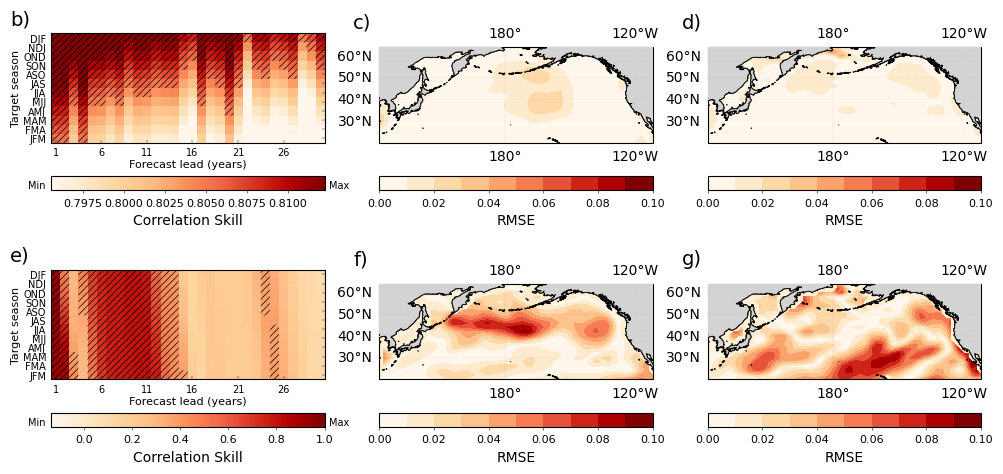

In [35]:
# plotted the PDO index correlation heat maps targeted different consecutive months and RMSE (Figure 2b-g))
fig = plt.figure(figsize=(12, 6))
grid = fig.add_gridspec(ncols=3, nrows=2,hspace=0.05)


ax1, cax1 = imagemaker(rmse_timmean_cnn_cold, '',grid[0,1],"c)")
ax2, cax2 = imagemaker(rmse_timmean_cnn_warm,'',grid[0,2],"d)")
ax3, cax3 = imagemaker(rmse_timmean_mme_cold,'',grid[1,1],"f)")
ax4, cax4 = imagemaker(rmse_timmean_mme_warm,'',grid[1,2],"g)")

ax5,cax5 = imagemaker_season(cnn_map_cwcnn,low_cnn,high_cnn,zm1_cnn,grid[0,0],"b)")
ax6,cax6 = imagemaker_season(cnn_map_mme,low_mme,high_mme,zm1_mme,grid[1,0],"e)")

plt.savefig(outdir+'Overall RMSE'+'.png',bbox_inches='tight')
plt.show()

# END